In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sns.set_style("ticks")

In [16]:
df1 = pd.read_csv('housing_prices_SLR.csv') 
df1.head(10)

,AREA,PRICE
0,1000,5617528.34
1,1030,5201397.67
2,1060,4778957.34
3,1090,5424564.78
4,1120,5657235.90
5,1150,4944801.22
6,1180,6474952.94
7,1210,5351641.54
8,1240,6289541.05
9,1270,6147374.49


In [17]:
df1.PRICE= np.round(df1.PRICE/1000)

In [18]:
df1.head(10)

,AREA,PRICE
0,1000,5618.0
1,1030,5201.0
2,1060,4779.0
3,1090,5425.0
4,1120,5657.0
5,1150,4945.0
6,1180,6475.0
7,1210,5352.0
8,1240,6290.0
9,1270,6147.0


In [19]:
print("Shape of df1: ",df1.shape)
print("data types: ", df1.dtypes)

Shape of df1:  (50, 2)
data types:  AREA       int64
PRICE    float64
dtype: object


In [20]:
x = df1[["AREA"]].values
y = df1["PRICE"].values

In [21]:
print("Shape of x", x.shape)
print("First 10 rows of x:\n", x[:10])

Shape of x (50, 1)
First 10 rows of x:
 [[1000]
 [1030]
 [1060]
 [1090]
 [1120]
 [1150]
 [1180]
 [1210]
 [1240]
 [1270]]


In [22]:
print("Shape of y", y.shape)
print("First 10 rows of y:\n", y[:10])

Shape of y (50,)
First 10 rows of y:
 [5618. 5201. 4779. 5425. 5657. 4945. 6475. 5352. 6290. 6147.]


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state =12)

In [24]:
print("Train: \n", x_train.shape, y_train.shape)
print("Test: \n", x_test.shape, y_test.shape)

Train: 
 (33, 1) (33,)
Test: 
 (17, 1) (17,)


In [25]:
print("Train:")
print("x_train:\n", x_train[:5])

print("\ny_train:\n",y_train[:5])


Train:
x_train:
 [[1270]
 [1990]
 [2410]
 [1600]
 [1480]]

y_train:
 [ 6147. 10240. 17310.  8074.  9968.]


In [28]:
print("x_train:\n", x_train[:8])
print("\ny_train:\n",y_train[:8])

x_train:
 [[1270]
 [1990]
 [2410]
 [1600]
 [1480]
 [1720]
 [2260]
 [1960]]

y_train:
 [ 6147. 10240. 17310.  8074.  9968. 10229. 17207.  9085.]


In [27]:
print("x_test:\n", x_test[:8])
print("\ny_test:\n",y_test[:8])

x_test:
 [[1840]
 [2380]
 [1210]
 [2230]
 [2080]
 [1870]
 [1630]
 [2440]]

y_test:
 [ 9763. 17604.  5352. 12641. 22270. 11527. 10201. 14036.]


In [34]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [35]:
y_pred = regressor.predict(x_test)

y_pred

array([11377.06802894, 15684.72058637,  6351.4733786 , 14488.15043153,
       13291.58027668, 11616.38205991,  9701.86981216, 16163.34864831,
        9223.24175022,  6590.78740957,  8744.61368829, 13770.20833862,
       13530.89430765,  8265.98562635, 12095.01012184,  8026.67159538,
       10898.439967  ])

In [36]:
y_test

array([ 9763., 17604.,  5352., 12641., 22270., 11527., 10201., 14036.,
       10067.,  6290.,  7614., 12618., 12574.,  7535., 10204.,  7304.,
        9288.])

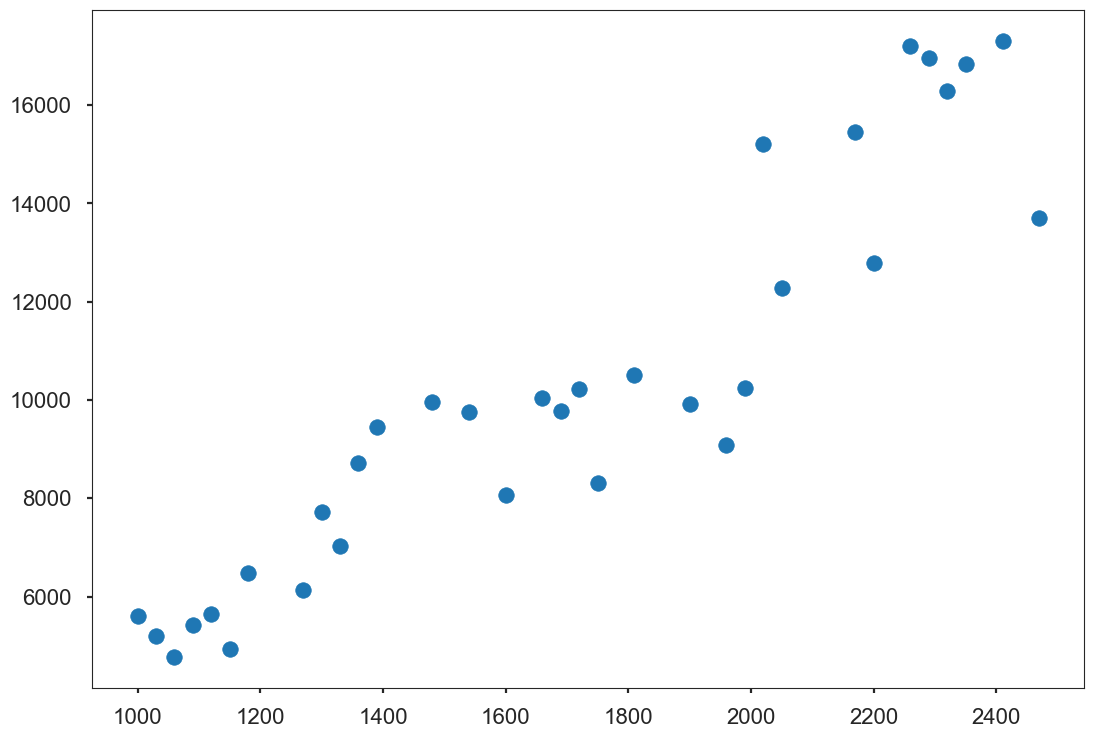

In [37]:
plt.scatter(x_train, y_train)

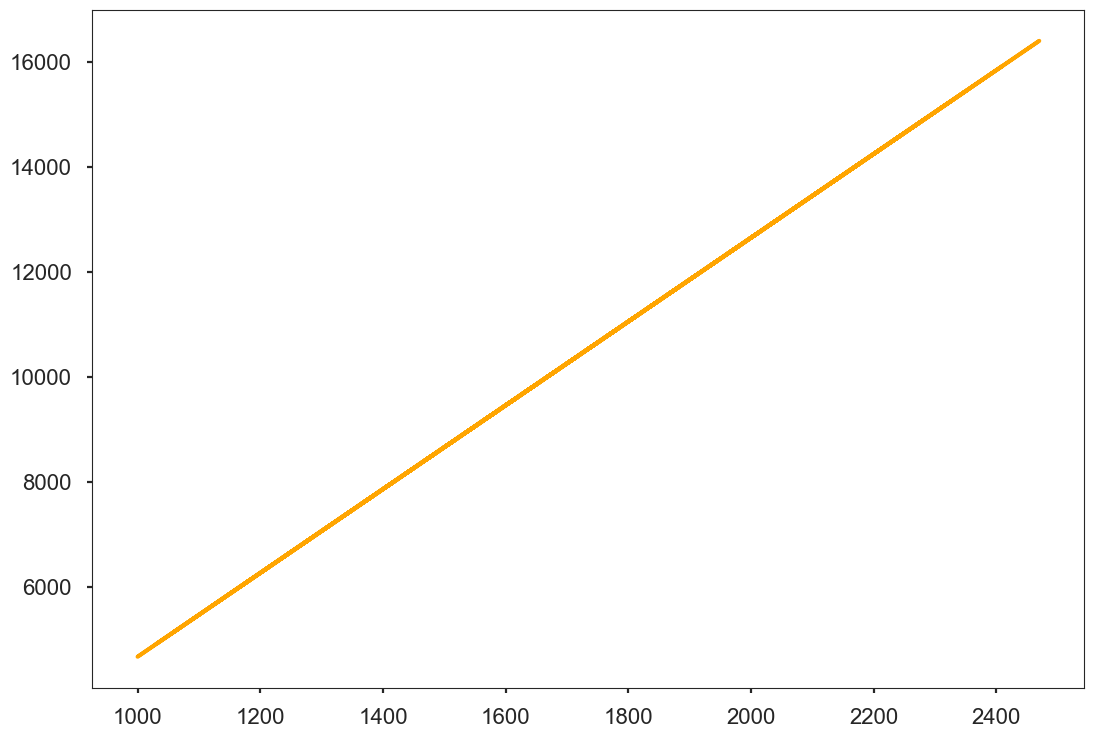

In [38]:
plt.plot(x_train, regressor.predict(x_train), color = 'orange')

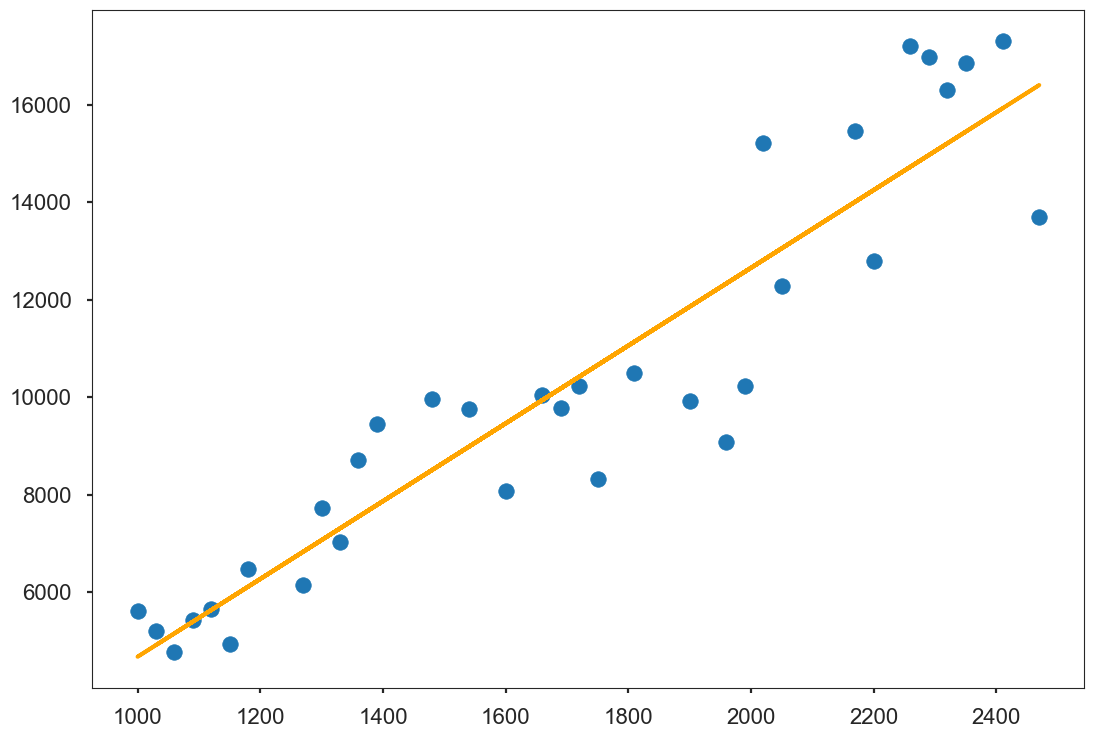

In [39]:
plt.scatter(x_train, y_train)
plt.plot(x_train, regressor.predict(x_train), color = 'orange')

Text(0.5, 1.0, 'House Area vs House Price (Train)')

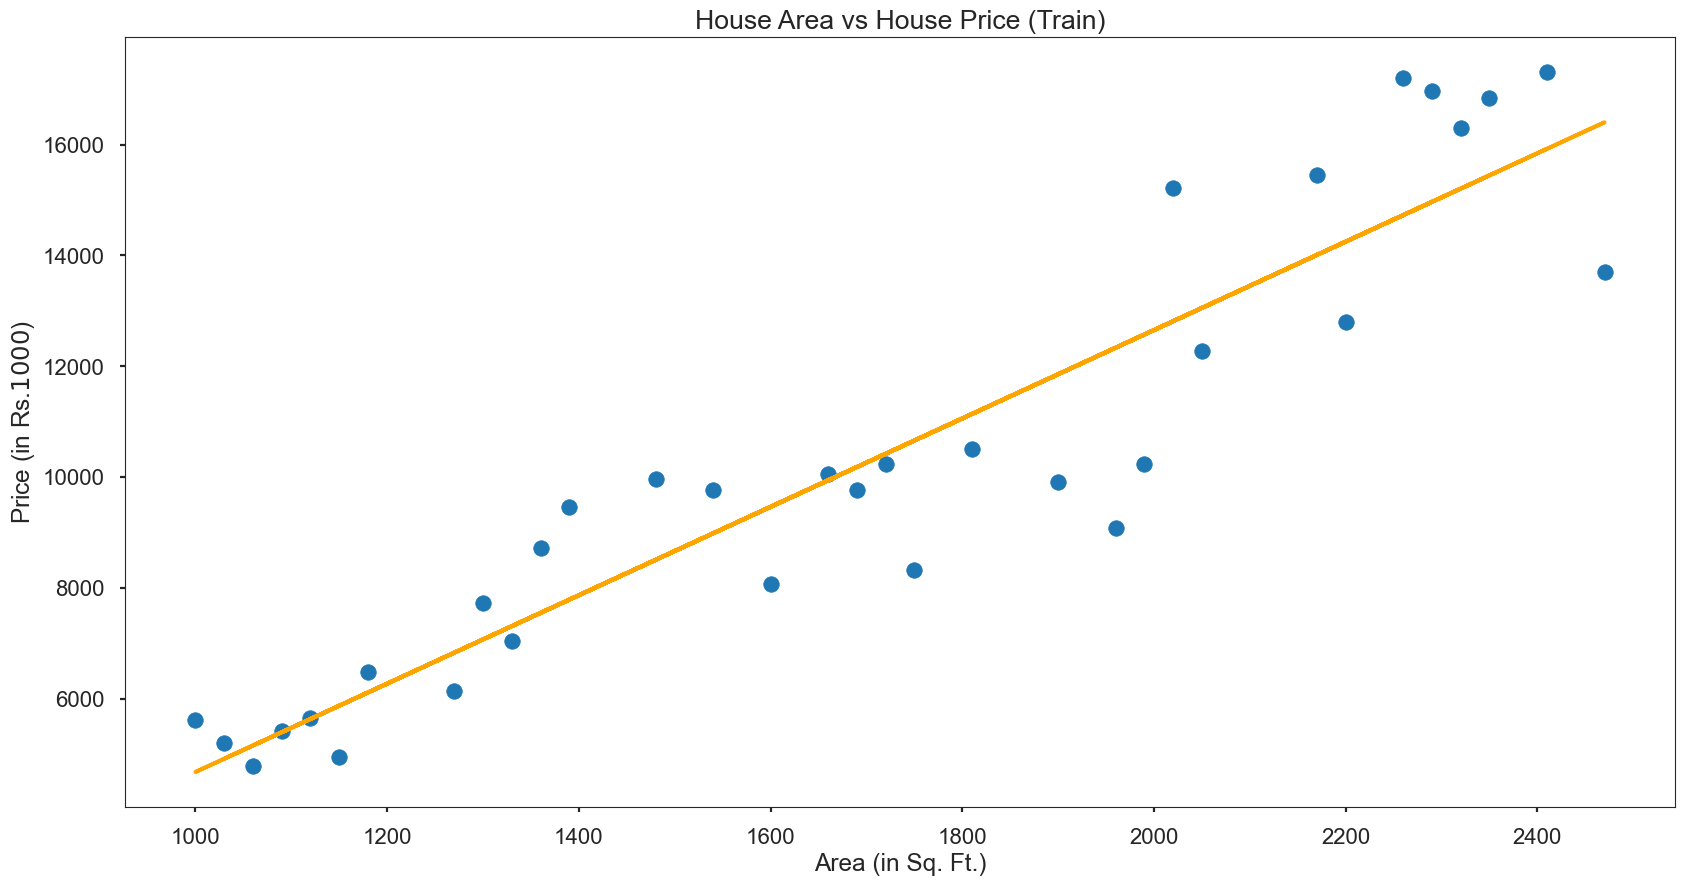

In [46]:
fig = plt.figure(figsize=(20,10))
ax=fig.add_subplot(111)
ax.scatter(x_train,y_train,antialiased=True)
ax.plot(x_train, regressor.predict(x_train), color='orange')
ax.set_xlabel("Area (in Sq. Ft.)")
ax.set_ylabel("Price (in Rs.$1000$)")
ax.set_title("House Area vs House Price (Train)")

In [47]:
#model evaluation

In [48]:
baseline_pred = np.round(y_train.mean(), 2)
print("Baseline prediction: ", baseline_pred)

Baseline prediction:  10216.76


In [49]:
differnces = y_train - baseline_pred
print("Errors: \n", differnces)

squared_differnces = differnces**2
print("\nSquared Errors:\n", squared_differnces)

sse = squared_differnces.sum()
print("\nSum of Squared Errors for Baseline model: ", sse)

Errors: 
 [-4069.76    23.24  7093.24 -2142.76  -248.76    12.24  6990.24 -1131.76
  2061.24  -441.76 -5015.76  -304.76 -4559.76  6076.24  5240.24  -454.76
  2576.24  6752.24 -4598.76 -2498.76  3482.24  5003.24 -1902.76  -759.76
 -5271.76  -165.76 -1504.76  6628.24 -4791.76 -5437.76 -3741.76   286.24
 -3181.76]

Squared Errors:
 [1.65629465e+07 5.40097600e+02 5.03140537e+07 4.59142042e+06
 6.18815376e+04 1.49817600e+02 4.88634553e+07 1.28088070e+06
 4.24871034e+06 1.95151898e+05 2.51578484e+07 9.28786576e+04
 2.07914113e+07 3.69206925e+07 2.74601153e+07 2.06806658e+05
 6.63701254e+06 4.55927450e+07 2.11485935e+07 6.24380154e+06
 1.21259954e+07 2.50324105e+07 3.62049562e+06 5.77235258e+05
 2.77914535e+07 2.74763776e+04 2.26430266e+06 4.39335655e+07
 2.29609639e+07 2.95692338e+07 1.40007679e+07 8.19333376e+04
 1.01235967e+07]

Sum of Squared Errors for Baseline model:  508480526.06079996


In [50]:
#creating function for calculating sse(sum of squared error)

In [51]:
def sse(y_true, y_pred):
    return ((y_true-y_pred)**2).sum()

In [52]:
y_train_pred = regressor.predict(x_train)

In [53]:
sse_train = sse(y_train, y_train_pred)
print("Regression Model SSE", sse_train)

Regression Model SSE 70914632.73588021
